In [4]:
# Inspirted by Rasjied Sloot's Example script.py.
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

Load an image and show the array

In [20]:
path + '*.fit'

'C:/Users/bvptr/academia/physics/year2/natuurkunde_en_sterrenkunde_practicum2/solar_physics_data/NP2 zonnefysica/20211112 - LISA daglicht spectra/*.fit'

In [22]:
file = "C:/Users/bvptr/academia/physics/year2/natuurkunde_en_sterrenkunde_practicum2/solar_physics_data/NP2 zonnefysica/20211112 - LISA daglicht spectra/sun-0001.fit"
data = fits.getdata(file)

import all files in the folder

In [38]:
import os
from pathlib import Path

path = "C:/Users/bvptr/academia/physics/year2/natuurkunde_en_sterrenkunde_practicum2/solar_physics_data/NP2 zonnefysica/20211112 - LISA daglicht spectra/"
files =  [ p for p in Path(path).glob('*.fit') ]
data_dict = dict()
for file in files:
    data_dict[os.path.basename(file)] = fits.getdata(file) # key of the dict is the filename.

Some statistics

In [29]:
mean = np.mean(data) ; stdev = np.std(data) ; median = np.median(data)
minimum = np.min(data) ; maximum = np.max(data)
print ('mean value:', mean) ; print ('standard deviation:', stdev) ; print ('median value:',median)
print('minimum value:', minimum) ; print ('max value:',maximum)

mean value: 11940.6800468293
standard deviation: 16922.37210494153
median value: 751.0
minimum value: 271
max value: 56290


plot the image

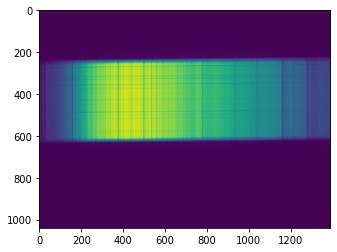

In [31]:
plt.imshow(data)
plt.show()

In [ ]:
const = 200
i = const
for x in data_dict.values():
    if i == const + 10:
        break
    plt.imshow(x)
    plt.show()
    i +=1

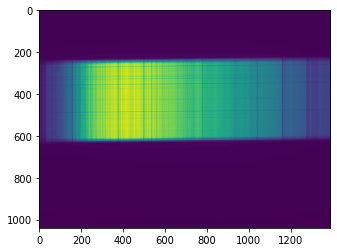

In [50]:
plt.imshow(data_dict['sun-0073.fit'])

or a bit better

In [55]:
from matplotlib.colors import LogNorm

def plot_image(image):
        

    vmin, vmax = np.percentile(image, [5, 95])
    #fig, ax1 = plt.subplots(1,1, figsize=(20,30))
    #plt.imshow(image, cmap='gray' , norm=LogNorm(vmin=0.9*vmin,vmax=1.5*vmax))
    plt.imshow(image, norm=LogNorm(vmin=0.9*vmin,vmax=1.5*vmax))
    plt.show()
    
#plot_image(data)


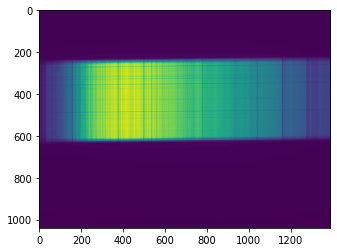

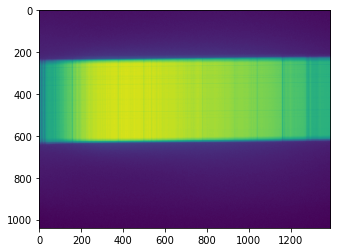

In [56]:
plt.imshow(data_dict['sun-0073.fit'])
plt.show()
plot_image(data_dict['sun-0073.fit'])

In [61]:
def plot_image(image):
    fig, ax1 = plt.subplots(1,1, figsize=(20,30))
    plt.imshow(image)
    plt.show()

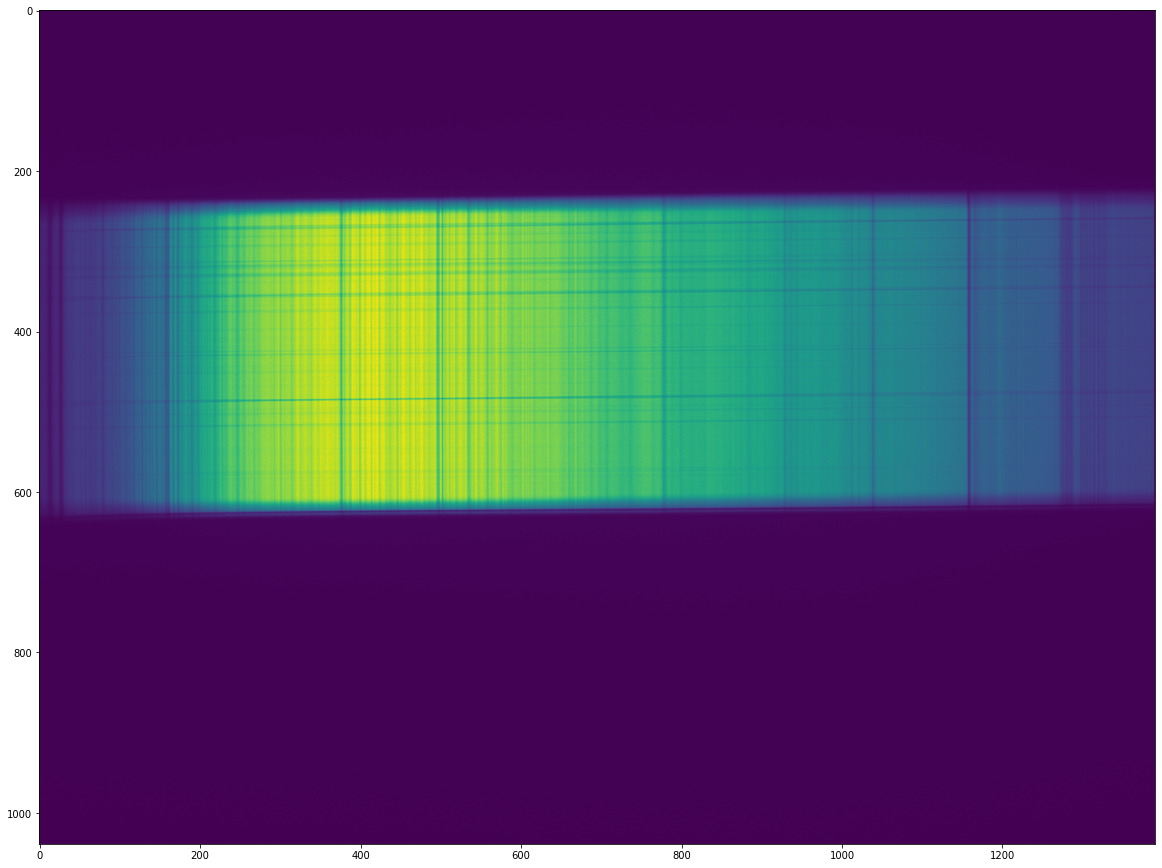

In [62]:
plot_image(data_dict['sun-0073.fit'])

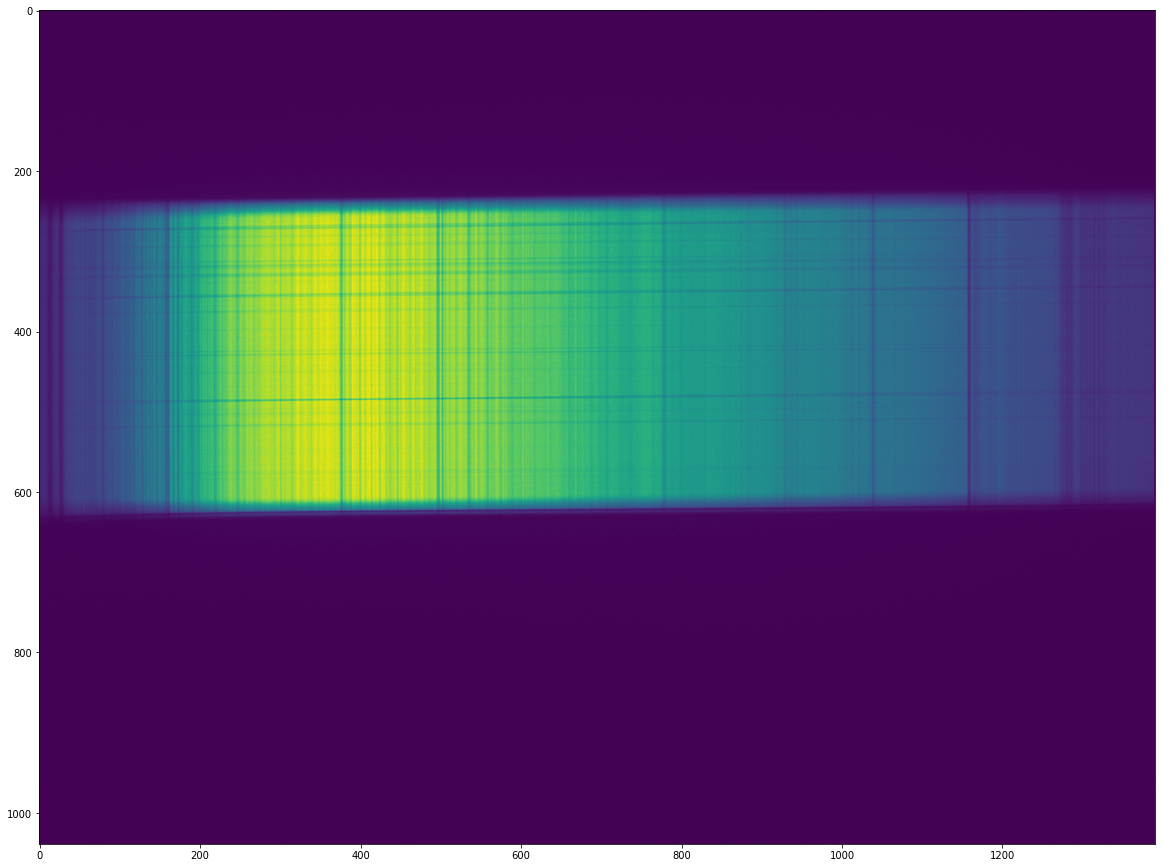

In [67]:
plot_image(data_dict['sun2-0027.fit'])

make a selection/crop

In [ ]:
# Does not work currently
crop2 = data[:,2000:3500]
plot_image(crop2)

crop1 = data[1700:2100]
plot_image(crop1)

intensity_profile=np.sum(crop1, axis=0)
plt.plot(intensity_profile)


Show data header

In [18]:
data_header = fits.getheader(file)
print(data_header)


SIMPLE  =                    T                                                  BITPIX  =                   16 /8 unsigned int, 16 & 32 int, -32 & -64 real     NAXIS   =                    2 /number of axes                                  NAXIS1  =                 1391 /fastest changing axis                           NAXIS2  =                 1039 /next to fastest changing axis                   BSCALE  =   1.0000000000000000 /physical = BZERO + BSCALE*array_value           BZERO   =   32768.000000000000 /physical = BZERO + BSCALE*array_value           DATE-OBS= '2021-11-12T08:53:57' /YYYY-MM-DDThh:mm:ss observation start, UT      EXPTIME =  0.47999999999999998 /Exposure time in seconds                        EXPOSURE=  0.47999999999999998 /Exposure time in seconds                        SET-TEMP=  -20.000000000000000 /CCD temperature setpoint in C                   CCD-TEMP=  -20.020000000000000 /CCD temperature at start of exposure in C       XPIXSZ  =   6.4500000000000002 /Pixel Wi

In [ ]:
print(fits.getheader())

display one specific element:

In [ ]:
header_info = data_header['FILTER']
print('FILTER USED:', header_info)
header_info2 = data_header['IMAGETYP']
print('IMAGE TYPE:', header_info2)